In [0]:
# Mounting the Training Dataset and Testing Dataset of UNSW-NB 15 DATASET edited

In [0]:
#training and testing data sets
import numpy as np
!wget -O training-set.csv https://intrusiondetectionproject.s3.ap-south-1.amazonaws.com/UNSW_NB15_training-set.csv
!wget -O testing-set.csv https://intrusiondetectionproject.s3.ap-south-1.amazonaws.com/UNSW_NB15_testing-set.csv

--2019-10-28 13:42:20--  https://intrusiondetectionproject.s3.ap-south-1.amazonaws.com/UNSW_NB15_training-set.csv
Resolving intrusiondetectionproject.s3.ap-south-1.amazonaws.com (intrusiondetectionproject.s3.ap-south-1.amazonaws.com)... 52.219.64.63
Connecting to intrusiondetectionproject.s3.ap-south-1.amazonaws.com (intrusiondetectionproject.s3.ap-south-1.amazonaws.com)|52.219.64.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15380800 (15M) [text/csv]
Saving to: ‘training-set.csv’

training-set.csv    100%[===================>]  14.67M  5.63MB/s    in 2.6s    

2019-10-28 13:42:24 (5.63 MB/s) - ‘training-set.csv’ saved [15380800/15380800]

--2019-10-28 13:42:26--  https://intrusiondetectionproject.s3.ap-south-1.amazonaws.com/UNSW_NB15_testing-set.csv
Resolving intrusiondetectionproject.s3.ap-south-1.amazonaws.com (intrusiondetectionproject.s3.ap-south-1.amazonaws.com)... 52.219.62.123
Connecting to intrusiondetectionproject.s3.ap-south-1.amazonaws.com (in

In [0]:
import pandas as pd

In [0]:
train= pd.read_csv('training-set.csv')

In [0]:
test = pd.read_csv('testing-set.csv')

In [0]:
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0


In [0]:
test.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


In [0]:
train.dtypes

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

In [0]:

# Now getting all object data types and converting to int64

train.proto.unique()

array(['udp', 'arp', 'tcp', 'igmp', 'ospf', 'sctp', 'gre', 'ggp', 'ip',
       'ipnip', 'st2', 'argus', 'chaos', 'egp', 'emcon', 'nvp', 'pup',
       'xnet', 'mux', 'dcn', 'hmp', 'prm', 'trunk-1', 'trunk-2',
       'xns-idp', 'leaf-1', 'leaf-2', 'irtp', 'rdp', 'netblt', 'mfe-nsp',
       'merit-inp', '3pc', 'idpr', 'ddp', 'idpr-cmtp', 'tp++', 'ipv6',
       'sdrp', 'ipv6-frag', 'ipv6-route', 'idrp', 'mhrp', 'i-nlsp', 'rvd',
       'mobile', 'narp', 'skip', 'tlsp', 'ipv6-no', 'any', 'ipv6-opts',
       'cftp', 'sat-expak', 'ippc', 'kryptolan', 'sat-mon', 'cpnx', 'wsn',
       'pvp', 'br-sat-mon', 'sun-nd', 'wb-mon', 'vmtp', 'ttp', 'vines',
       'nsfnet-igp', 'dgp', 'eigrp', 'tcf', 'sprite-rpc', 'larp', 'mtp',
       'ax.25', 'ipip', 'aes-sp3-d', 'micp', 'encap', 'pri-enc', 'gmtp',
       'ifmp', 'pnni', 'qnx', 'scps', 'cbt', 'bbn-rcc', 'igp', 'bna',
       'swipe', 'visa', 'ipcv', 'cphb', 'iso-tp4', 'wb-expak', 'sep',
       'secure-vmtp', 'xtp', 'il', 'rsvp', 'unas', 'fc', 'iso-ip',


In [0]:
# Import label encoder 
#Converting String features to int 64

from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'proto' 
train['proto']= label_encoder.fit_transform(train['proto']) 
  
train['proto'].unique() 


train['service']= label_encoder.fit_transform(train['service']) 
  
train['service'].unique() 

train['state']= label_encoder.fit_transform(train['state']) 
  
train['state'].unique() 

train['attack_cat']= label_encoder.fit_transform(train['attack_cat']) 
  
train['attack_cat'].unique() 

array([6, 7, 1, 2, 3, 0, 4, 9, 8, 5])

In [0]:
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,117,0,4,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,6,0
1,2,0.000008,117,0,4,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,6,0
2,3,0.000005,117,0,4,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,6,0
3,4,0.000006,117,0,4,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,6,0
4,5,0.000010,117,0,4,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,6,0


In [0]:
#Converted all String values to int64

# Now, we can do feature selection

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
id                   82332 non-null int64
dur                  82332 non-null float64
proto                82332 non-null int64
service              82332 non-null int64
state                82332 non-null int64
spkts                82332 non-null int64
dpkts                82332 non-null int64
sbytes               82332 non-null int64
dbytes               82332 non-null int64
rate                 82332 non-null float64
sttl                 82332 non-null int64
dttl                 82332 non-null int64
sload                82332 non-null float64
dload                82332 non-null float64
sloss                82332 non-null int64
dloss                82332 non-null int64
sinpkt               82332 non-null float64
dinpkt               82332 non-null float64
sjit                 82332 non-null float64
djit                 82332 non-null float64
swin                 82332 non-null

In [0]:
train['label'].unique()

array([0, 1])

In [0]:
#Apply feature scaling to normalize the dataset

from sklearn.preprocessing import MinMaxScaler
from sklearn.externals import joblib 

scaler = MinMaxScaler(feature_range=(0,1))
scaledTrain = scaler.fit(train)

scaledTrain = scaler.transform(train)

cols = train.columns

scaledTrain = pd.DataFrame(scaledTrain, columns = cols)

scaledTrain.head()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000000,1.833334e-07,0.9,0.0,0.666667,0.000094,0.0,0.000033,0.0,0.090909,0.996078,0.0,0.034238,0.0,0.0,0.0,1.833028e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151351,0.0,0.0,0.0,0.016129,0.333333,0.000000,0.000000,0.0,0.016129,0.0,0.0,0.0,0.000000,0.016393,0.0,0.666667,0.0
1,0.000012,1.333334e-07,0.9,0.0,0.666667,0.000094,0.0,0.000121,0.0,0.125000,0.996078,0.0,0.167236,0.0,0.0,0.0,1.333111e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.579054,0.0,0.0,0.0,0.016129,0.333333,0.000000,0.000000,0.0,0.016129,0.0,0.0,0.0,0.000000,0.016393,0.0,0.666667,0.0
2,0.000024,8.333335e-08,0.9,0.0,0.666667,0.000094,0.0,0.000073,0.0,0.200000,0.996078,0.0,0.162187,0.0,0.0,0.0,8.331946e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.344595,0.0,0.0,0.0,0.032258,0.333333,0.000000,0.000000,0.0,0.032258,0.0,0.0,0.0,0.000000,0.032787,0.0,0.666667,0.0
3,0.000036,1.000000e-07,0.9,0.0,0.666667,0.000094,0.0,0.000061,0.0,0.166667,0.996078,0.0,0.113895,0.0,0.0,0.0,9.998335e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.287838,0.0,0.0,0.0,0.032258,0.333333,0.017241,0.017241,0.0,0.032258,0.0,0.0,0.0,0.016949,0.032787,0.0,0.666667,0.0
4,0.000049,1.666667e-07,0.9,0.0,0.666667,0.000094,0.0,0.000146,0.0,0.100000,0.996078,0.0,0.161427,0.0,0.0,0.0,1.666389e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.702027,0.0,0.0,0.0,0.032258,0.333333,0.017241,0.017241,0.0,0.032258,0.0,0.0,0.0,0.016949,0.032787,0.0,0.666667,0.0


In [0]:
#apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest, chi2

X = scaledTrain.iloc[:,0:44]  #independent columns
y = scaledTrain.iloc[:,-1] 


bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

               Specs        Score
20              swin  6741.831784
23              dwin  5577.773964
10              sttl  4673.090072
35  ct_dst_sport_ltm  4531.214309
34  ct_src_dport_ltm  2965.904033
13             dload  2826.178482
22             dtcpb  2728.865829
21             stcpb  2707.826415
9               rate  2383.128526
36    ct_dst_src_ltm  2101.022985


In [0]:
#  Now , we extracted all the important 10 features 

# Feature Importance
#from sklearn.ensemble import ExtraTreesClassifier
#import matplotlib.pyplot as plt
#model = ExtraTreesClassifier()
#model.fit(X,y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
#feat_importances = pd.Series(model.feature_importances_, index=X.columns)
#feat_importances.nlargest(10).plot(kind='barh')
#plt.show()


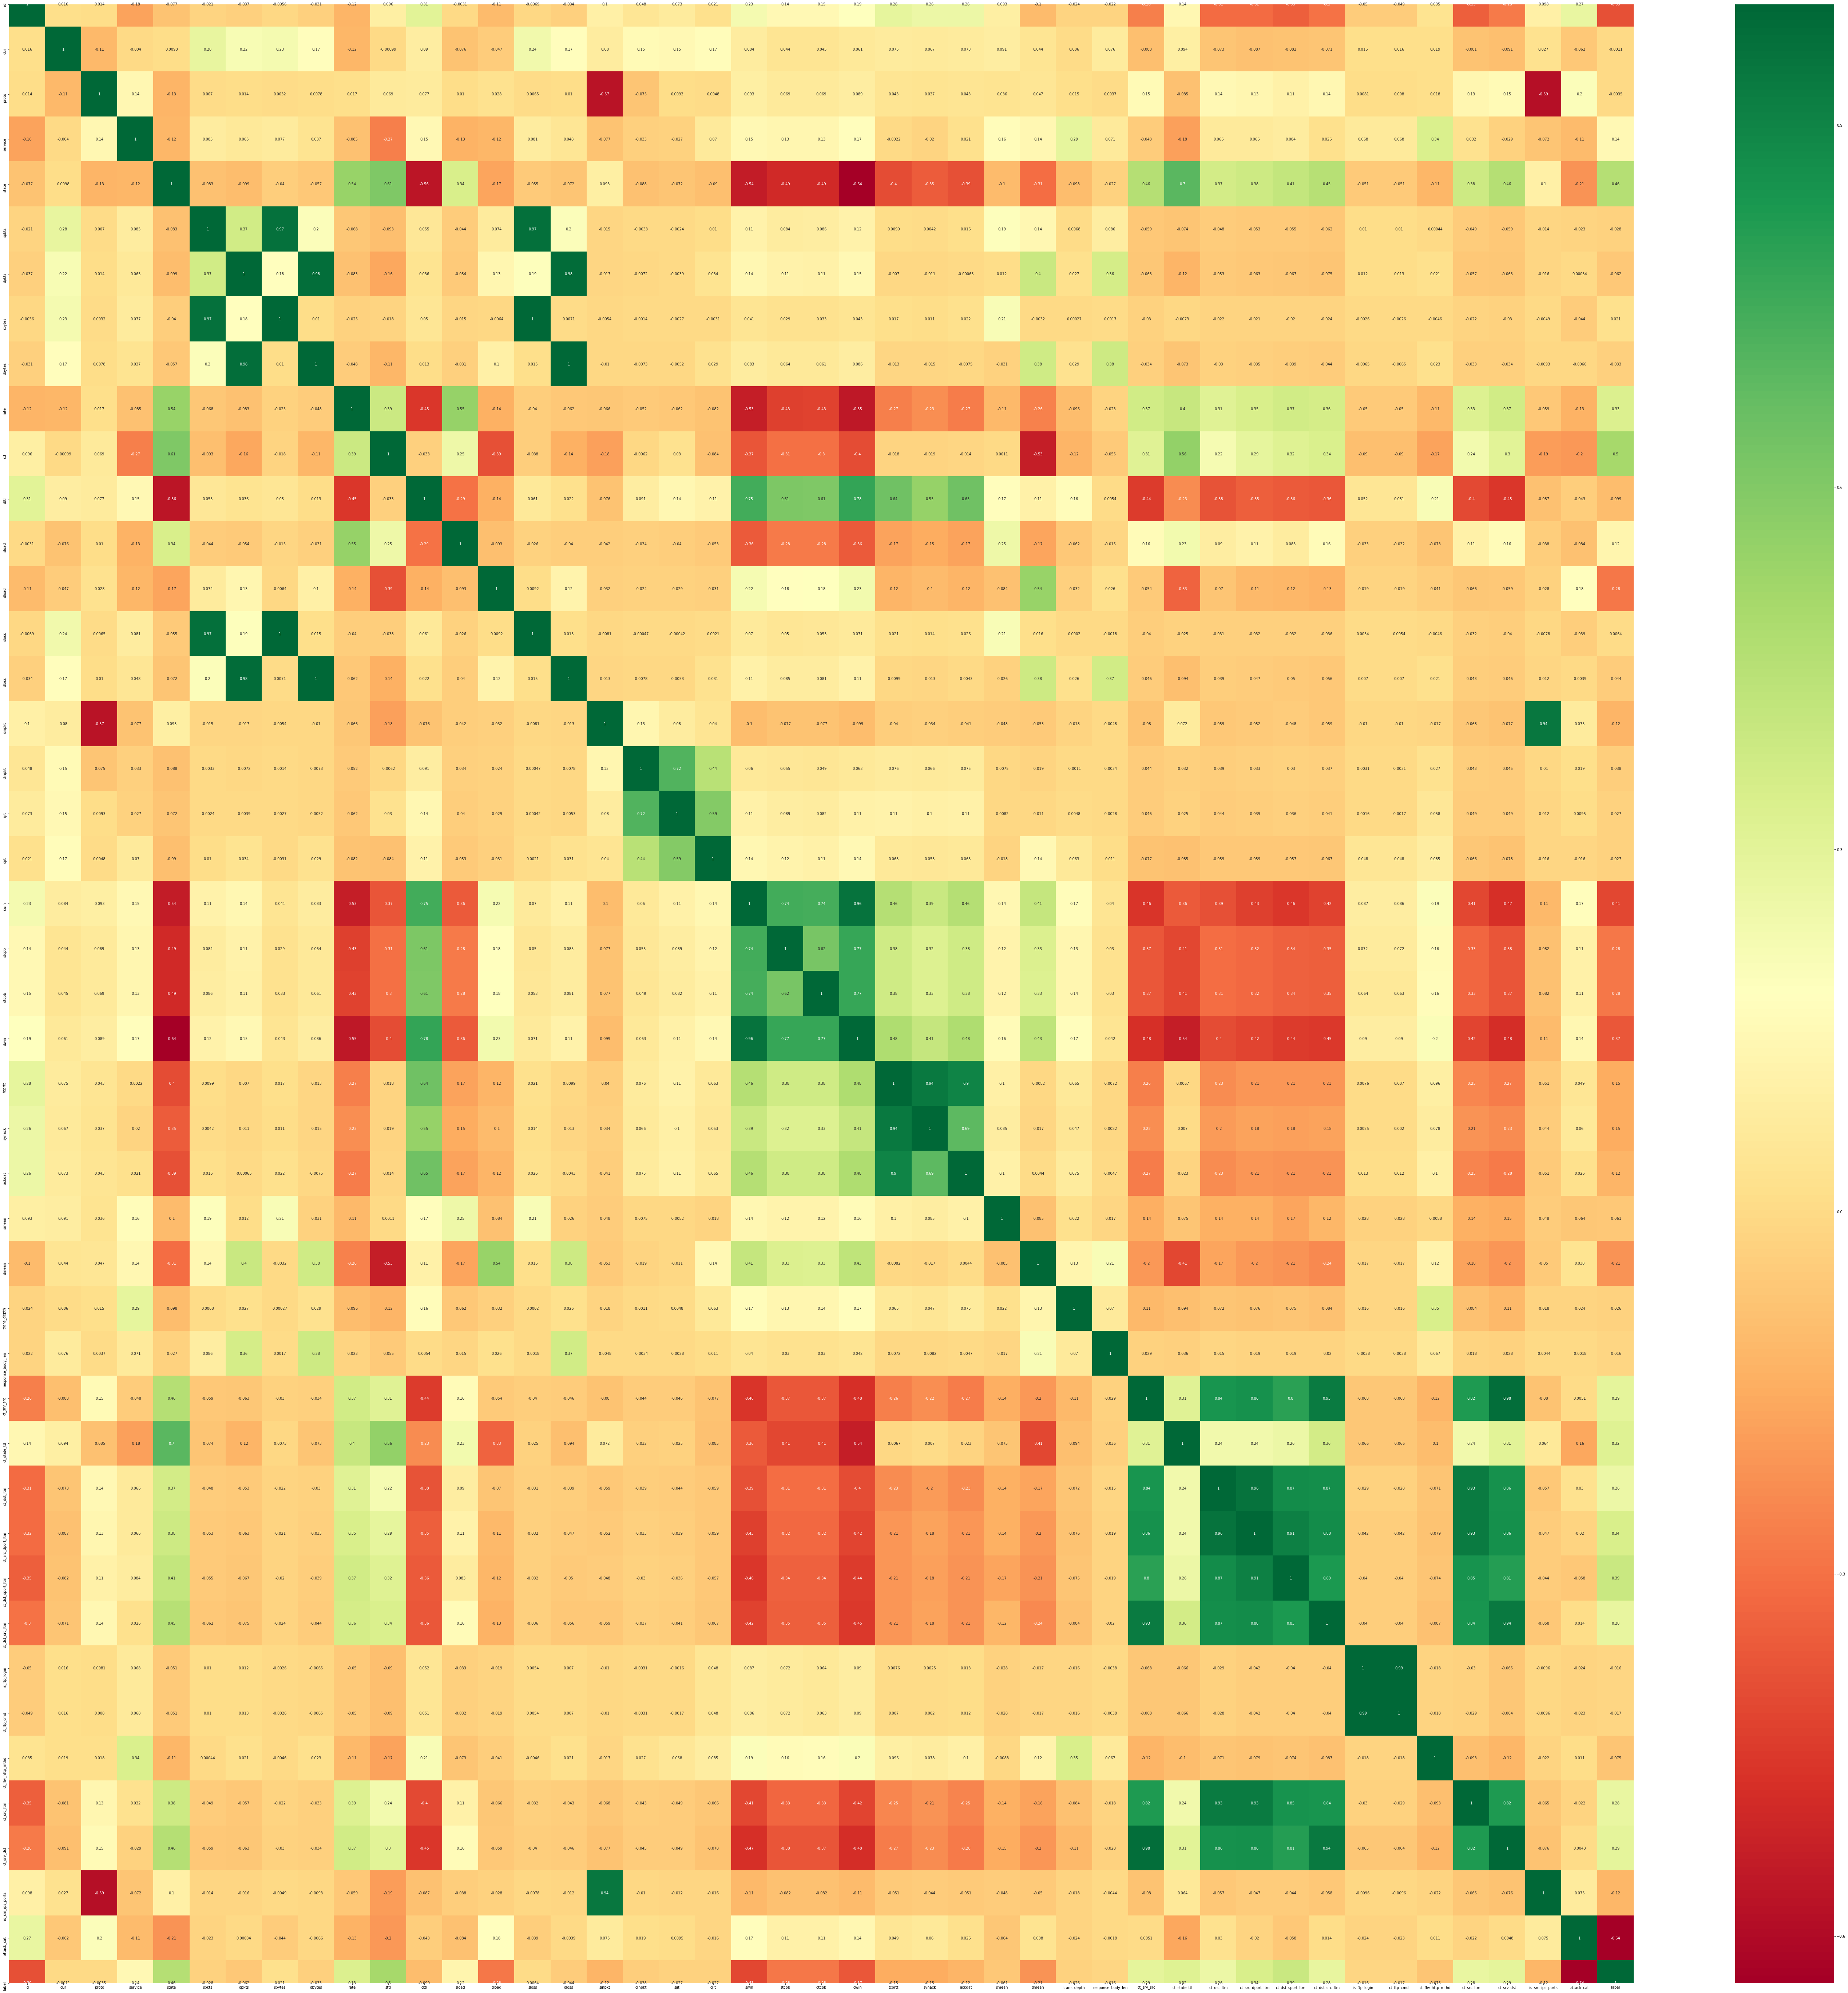

In [0]:
#get correlations of each features in dataset

import seaborn as sns
import matplotlib.pyplot as plt

corrmat = scaledTrain.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(100,100))
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [0]:
# Now, the remaining work in step1 is data cleaning part( like converting null values to non null),
# do Feature Scaling and Dimensionality Reduction..
# for the top 10 features ( in that ignore id and drop it off cos its just a number given to the test done in tcpdump)

# finally, create a new Df which has only 9 ( with all these 2 things done)...

# any doubt or help , msg me or call me...

In [0]:
#check for null values in the dataframe

scaledTrain.isnull().values.any()

False

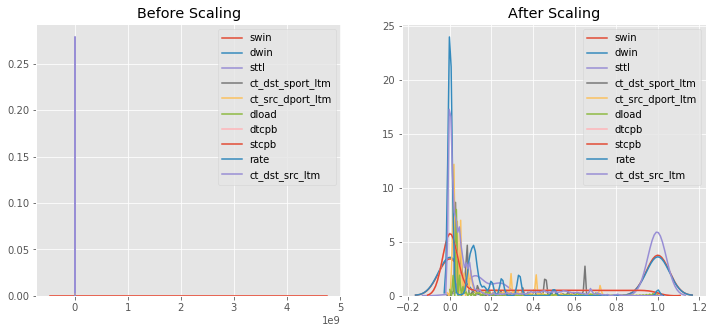

In [0]:
#features before and after scaling

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(train['swin'], ax=ax1)
sns.kdeplot(train['dwin'], ax=ax1)
sns.kdeplot(train['sttl'], ax=ax1)
sns.kdeplot(train['ct_dst_sport_ltm'], ax=ax1)
sns.kdeplot(train['ct_src_dport_ltm'], ax=ax1)
sns.kdeplot(train['dload'], ax=ax1)
sns.kdeplot(train['dtcpb'], ax=ax1)
sns.kdeplot(train['stcpb'], ax=ax1)
sns.kdeplot(train['rate'], ax=ax1)
sns.kdeplot(train['ct_dst_src_ltm'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(scaledTrain['swin'], ax=ax2)
sns.kdeplot(scaledTrain['dwin'], ax=ax2)
sns.kdeplot(scaledTrain['sttl'], ax=ax2)
sns.kdeplot(scaledTrain['ct_dst_sport_ltm'], ax=ax2)
sns.kdeplot(scaledTrain['ct_src_dport_ltm'], ax=ax2)
sns.kdeplot(scaledTrain['dload'], ax=ax2)
sns.kdeplot(scaledTrain['dtcpb'], ax=ax2)
sns.kdeplot(scaledTrain['stcpb'], ax=ax2)
sns.kdeplot(scaledTrain['rate'], ax=ax2)
sns.kdeplot(scaledTrain['ct_dst_src_ltm'], ax=ax2)

plt.show()

In [0]:
#create a df with the selected important features

rawTrain = train[['swin', 'dwin', 'sttl', 'ct_dst_sport_ltm', 'ct_src_dport_ltm', 'dload', 'dtcpb', 'stcpb', 'rate', 'ct_dst_src_ltm']].copy()
newScaler = MinMaxScaler(feature_range=(0,1))
rawScaledTrain = scaler.fit(rawTrain)

joblib.dump(rawScaledTrain, 'scaler_model.pkl')


newTrain = scaledTrain[['swin', 'dwin', 'sttl', 'ct_dst_sport_ltm', 'ct_src_dport_ltm', 'dload', 'dtcpb', 'stcpb', 'rate', 'ct_dst_src_ltm']].copy()
newTrain.head(20)

t = newTrain.loc[[243]]
print(rawScaledTrain.transform(t))

[[ 0.00000000e+00  0.00000000e+00  3.90618993e-03 -2.70270270e-02
  -1.72413793e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   2.06076659e-11 -1.58688866e-02]]


In [0]:
newTrain.tail(20)

,swin,dwin,sttl,ct_dst_sport_ltm,ct_src_dport_ltm,dload,dtcpb,stcpb,rate,ct_dst_src_ltm
82312,1.0,1.0,0.996078,0.0,0.0,0.000101,0.479978,0.306242,0.000014,0.000000
82313,0.0,0.0,0.996078,0.0,0.0,0.000000,0.000000,0.000000,0.111111,0.000000
82314,1.0,1.0,0.996078,0.0,0.0,0.000164,0.859273,0.599016,0.000029,0.000000
82315,0.0,0.0,0.996078,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.016129
82316,0.0,0.0,0.996078,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.016129
82317,1.0,1.0,0.996078,0.0,0.0,0.000091,0.736711,0.864785,0.000016,0.048387
82318,0.0,0.0,0.996078,0.0,0.0,0.000000,0.000000,0.000000,0.111111,0.016129
82319,1.0,1.0,0.996078,0.0,0.0,0.000106,0.671587,0.812087,0.000018,0.048387
82320,0.0,0.0,0.996078,0.0,0.0,0.000000,0.000000,0.000000,0.100000,0.016129
82321,0.0,0.0,0.996078,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.016129


In [0]:
#copying the scaled training data to X
X=newTrain
X.head()

,swin,dwin,sttl,ct_dst_sport_ltm,ct_src_dport_ltm,dload,dtcpb,stcpb,rate,ct_dst_src_ltm
0,0.0,0.0,0.996078,0.0,0.000000,0.0,0.0,0.0,0.090909,0.016129
1,0.0,0.0,0.996078,0.0,0.000000,0.0,0.0,0.0,0.125000,0.016129
2,0.0,0.0,0.996078,0.0,0.000000,0.0,0.0,0.0,0.200000,0.032258
3,0.0,0.0,0.996078,0.0,0.017241,0.0,0.0,0.0,0.166667,0.032258
4,0.0,0.0,0.996078,0.0,0.017241,0.0,0.0,0.0,0.100000,0.032258


In [0]:
y = scaledTrain['label']

Now, we apply Machine Learning Algorithms:

 K Nearest Neighbor(KNN)
 
 Support Vector Machine
 
 Logistic Regression


KNN ALORITHM

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (65865, 10) (65865,)
Test set: (16467, 10) (16467,)


In [0]:
# when we set k=3

from sklearn.neighbors import KNeighborsClassifier
k = 3

knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn
 
pred =knn.predict(X_test)

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, pred))

Train set Accuracy:  0.9380095650193577
Test set Accuracy:  0.9032003400740876


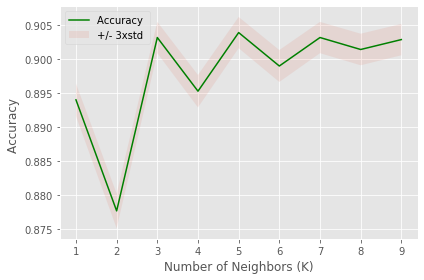

Best accuracy: 0.9039290702617356 k= 5


In [0]:
# Finding the best value of k
#import numpy As nlp
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

ConfustionMx = [];
for n in range(1,Ks):
    
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    pred=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, pred)

    
    std_acc[n-1]=np.std(pred==y_test)/np.sqrt(pred.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "Best accuracy:", mean_acc.max(), "k=", mean_acc.argmax()+1)

We get best accuracy for KNN , when k is 3, with a accuracy of 82%.

In [0]:
#Report

# Importing the classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,pred))

[[6342 1097]
 [ 502 8526]]


In [0]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89      7439
         1.0       0.89      0.94      0.91      9028

    accuracy                           0.90     16467
   macro avg       0.91      0.90      0.90     16467
weighted avg       0.90      0.90      0.90     16467



In [0]:
#serialize the model 

import pickle
pickle.dump(neigh, open("knnmodel.pkl", "wb"))

SVM

In [0]:
from sklearn.svm import SVC
model=SVC()

In [0]:
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
pred=model.predict(X_test)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
print(confusion_matrix(y_test,pred))

[[5383 2056]
 [1396 7632]]


In [0]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.79      0.72      0.76      7439
         1.0       0.79      0.85      0.82      9028

    accuracy                           0.79     16467
   macro avg       0.79      0.78      0.79     16467
weighted avg       0.79      0.79      0.79     16467



Applying PCA in SVM

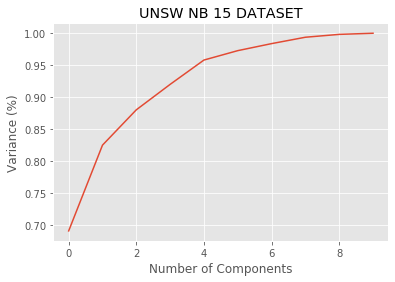

In [0]:
#Finding best 'component dimension for PCA'
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(X)

#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('UNSW NB 15 DATASET')
plt.show()

We can see that Number of Components as 3 with Variance around 90 to 93% 

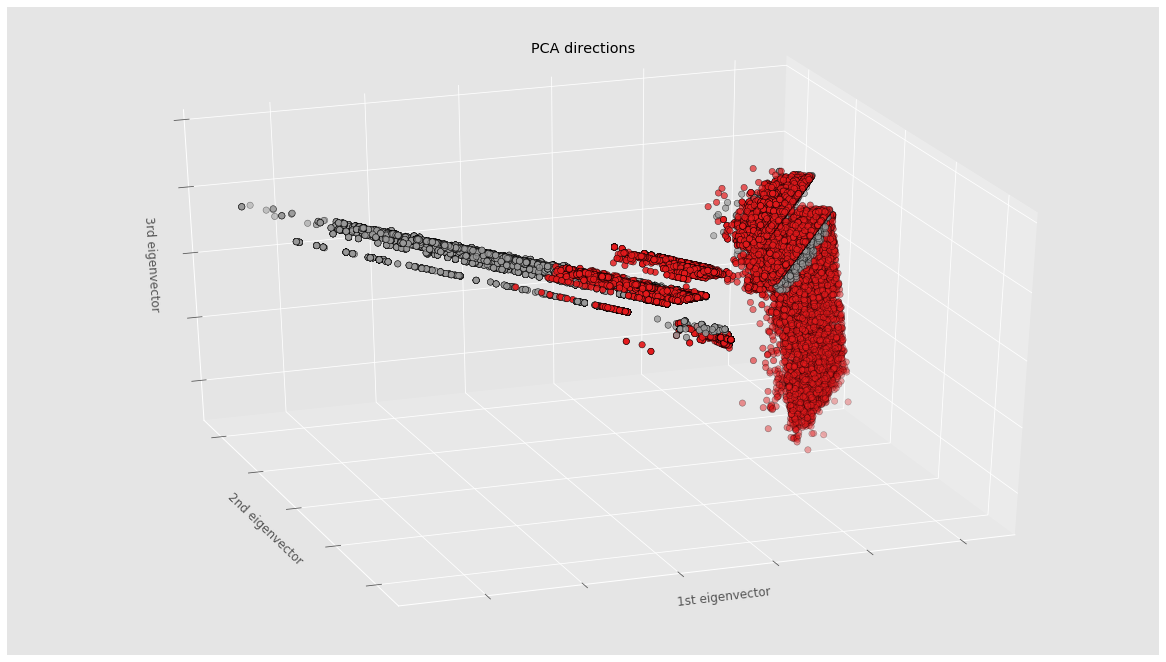

The number of features in the new subspace is  3


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

fig = plt.figure(1, figsize=(16, 9))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X_scaled)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()
print("The number of features in the new subspace is " ,X_reduced.shape[1])

In [0]:
from sklearn.svm import LinearSVC

clf = LinearSVC(penalty='l2', loss='squared_hinge',
                dual=True, tol=0.0001, C=100,
                fit_intercept=True, intercept_scaling=1, class_weight=None,verbose=0
                , random_state=0, max_iter=500)

from sklearn.model_selection import train_test_split

X_trains, X_tests, y_trains, y_tests = train_test_split(
                        X_reduced, y, test_size=0.2, random_state=42)


clf.fit(X_trains,y_trains)

print('Accuracy of linear SVC on training set: {:.2f}'.format(clf.score(X_trains, y_trains)))

print('Accuracy of linear SVC on test set: {:.2f}'.format(clf.score(X_tests, y_tests)))

Accuracy of linear SVC on training set: 0.70
Accuracy of linear SVC on test set: 0.70


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
# Doing Grid Search 

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np
    
c = np.logspace(start = -15, stop = 1000, base = 1.02)
param_grid = {'C': c}


grid = GridSearchCV(clf, param_grid =param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid.fit(X_trains, y_trains)
  
print("The best parameters are %s with a score of %0.0f" % (grid.best_params_, grid.best_score_ * 100 ))
print( "Best estimator accuracy on test set {:.2f} ".format(grid.best_estimator_.score(X_tests, y_tests) * 100 ) )

The best parameters are {'C': 231.76467070363972} with a score of 74
Best estimator accuracy on test set 74.49 


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
y_trues, y_preds = y_tests, clf.predict(X_tests)
print( '\nClassification report\n' )
print(classification_report(y_trues, y_preds))


Classification report

              precision    recall  f1-score   support

         0.0       0.96      0.35      0.51      7418
         1.0       0.65      0.99      0.78      9049

    accuracy                           0.70     16467
   macro avg       0.80      0.67      0.65     16467
weighted avg       0.79      0.70      0.66     16467



In [0]:
#serialize the model

pickle.dump(grid, open("svcmodel.pkl", "wb"))

Logistic Regression

In [0]:

from sklearn.linear_model import LogisticRegression


In [0]:
#Train the model
model = LogisticRegression()
model.fit(X_train, y_train) #Training the model

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#Test the model
predictions = model.predict(X_test)

#confusion matrix
print(confusion_matrix(y_test,predictions))


#Check precision, recall, f1-score
print( classification_report(y_test, predictions) )

[[5231 2208]
 [1377 7651]]
              precision    recall  f1-score   support

         0.0       0.79      0.70      0.74      7439
         1.0       0.78      0.85      0.81      9028

    accuracy                           0.78     16467
   macro avg       0.78      0.78      0.78     16467
weighted avg       0.78      0.78      0.78     16467



In [0]:
#serialize the model

pickle.dump(model, open("logregmodel.pkl", "wb"))

Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Using Grid Search in Random Forest

In [0]:
#from sklearn.model_selection import RandomizedSearchCV

# number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 300, num = 10)]

# number of features at every split
#max_features = ['auto']

# max depth
#max_depth = [int(x) for x in np.linspace(100, 200, num = 11)]
#max_depth.append(None)

# create random grid
#random_grid = {
 #'n_estimators': n_estimators,
 #'max_features': max_features,
 #'max_depth': max_depth
 #}
# Random search of parameters
#rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs =20)
# Fit the model
#rfc_random.fit(X_train, y_train)
# print results
#print(rfc_random.best_params_)

In [0]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

=== Confusion Matrix ===
[[6905  534]
 [ 449 8579]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93      7439
         1.0       0.94      0.95      0.95      9028

    accuracy                           0.94     16467
   macro avg       0.94      0.94      0.94     16467
weighted avg       0.94      0.94      0.94     16467





In [0]:
#serialize the model

pickle.dump(rfc, open("randforestmodel.pkl", "wb"))

Neural Networks

In [0]:
!pip install tensorflow
!pip install scikit-learn
!pip install keras

In [0]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_dim=10,activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


Using TensorFlow backend.


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, verbose=0)

loss, accuracy = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy: %f' % (accuracy))
#print('Loss: %f' % (loss))




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








Accuracy: 0.882062


In [0]:
#serialize the model

pickle.dump(model, open("neuralnetmodel.pkl", "wb"))

In [0]:
newTrain.head()

,swin,dwin,sttl,ct_dst_sport_ltm,ct_src_dport_ltm,dload,dtcpb,stcpb,rate,ct_dst_src_ltm
0,0.0,0.0,0.996078,0.0,0.000000,0.0,0.0,0.0,0.090909,0.016129
1,0.0,0.0,0.996078,0.0,0.000000,0.0,0.0,0.0,0.125000,0.016129
2,0.0,0.0,0.996078,0.0,0.000000,0.0,0.0,0.0,0.200000,0.032258
3,0.0,0.0,0.996078,0.0,0.017241,0.0,0.0,0.0,0.166667,0.032258
4,0.0,0.0,0.996078,0.0,0.017241,0.0,0.0,0.0,0.100000,0.032258


In [0]:
tmp = y.tolist()
for i in range(len(tmp)//300):
  if(tmp[i] == 1.0):
    print(i)

243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273


In [0]:
X.loc[[273]]

,swin,dwin,sttl,ct_dst_sport_ltm,ct_src_dport_ltm,dload,dtcpb,stcpb,rate,ct_dst_src_ltm
273,1.0,1.0,0.996078,0.0,0.017241,0.000412,0.462867,0.900855,0.000072,0.177419


In [0]:
y.loc[273]

1.0

In [0]:
train.iloc[273, [20, 23, 10, 35, 34, 13, 22, 21, 9, 36]]

swin                2.550000e+02
dwin                2.550000e+02
sttl                2.540000e+02
ct_dst_sport_ltm    1.000000e+00
ct_src_dport_ltm    2.000000e+00
dload               8.568710e+03
dtcpb               1.987961e+09
stcpb               3.869127e+09
rate                7.172469e+01
ct_dst_src_ltm      1.200000e+01
Name: 273, dtype: float64